#  Imports and Read in One Map

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

In [2]:
from projections import transform_map

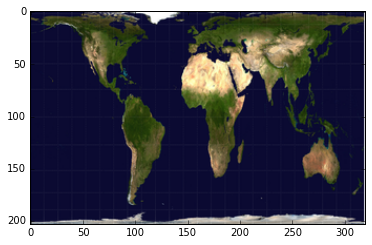

In [3]:
map1 = misc.imread('/Users/pfoley/map_projections/input_images/Gall-peters_smallest.png')
plt.imshow(map1)

#  Example Transformation

In [4]:
from projections import rotationFromXYZ

In [5]:
rot_mat = rotationFromXYZ(np.pi/8, np.pi/5, -np.pi/3)

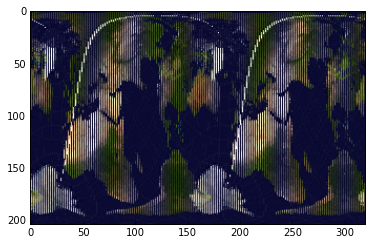

In [6]:
map2 = transform_map(map1, rot_mat, debug = False)